## Linear Regression

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png">

Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section, we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form

$$y=\beta_0+\beta_1x$$
 
where $\beta_1$ is commonly known as the slope, and $\beta_0$ is commonly known as the intercept.
Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [2]:
# rng.rand = random numbers from 0-1
# *10 will generate num from 0-10

rng = np.random.RandomState(1)
x = 10*rng.rand(50) #uses 50 values from 0-10
x[0:2]

array([4.17022005, 7.20324493])

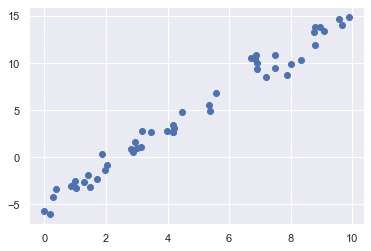

In [3]:
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [4]:
xfit = np.linspace(0, 10, 1000)
xfit[0:2]

array([0.        , 0.01001001])

In [5]:
x[np.newaxis,:]

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
        8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
        8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
        1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
        9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
        6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
        9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
        1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
        2.87775339e+00, 1.30028572e+00]])

In [6]:
# Column vector
x[0:5, np.newaxis]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

In [7]:
x.shape

(50,)

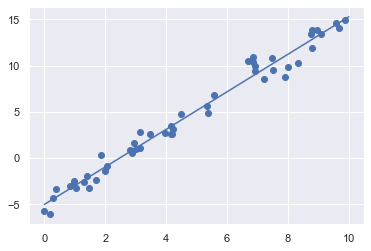

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
#This is the model
model.fit(x[:, np.newaxis], y)
#Predicting some points using the model
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

#Plot a graph
plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [9]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

## Predict new value

Using ``predict`` method, we can estimate the new response value

In [10]:
# predict for a new observation
X_new = np.array([[2.5]])
model.predict(X_new)

array([0.06944494])

## Statmodels for Linear Regression

Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation. This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              299.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                    1.59e-22
Time:                        11:32:19   Log-Likelihood:                         -123.85
No. Observations:                  50   AIC:                                      249.7
Df Residuals:                      49   BIC:                                      251.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2773      0.074     17.315      0.000       1.129       1.426
==============================================================================
Omnibus:                        8.013   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                2.657
Skew:                           0.135   Prob(JB):                        0.265
Kurtosis:                       1.903   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

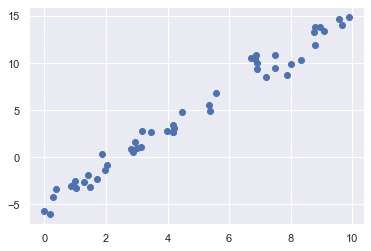

In [11]:
import statsmodels.api as sm

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y);

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [12]:
rng = np.random.RandomState(1)
X = rng.rand(100, 3)
#X

In [13]:
y = np.dot(X, [1.5, -2., 1.])
#y

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000102
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. The idea is to take our multidimensional linear model:

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$
 
and build the $x_1$, $x_2$, $x_3$ and so on, from our single-dimensional input $x$. That is, we let  $x_n=f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if  $f_n(x)=x_n$ , our model becomes a polynomial regression:

$$y=\beta_0+\beta_1x_1+\beta_2x^2+\beta_3x^3⋯+\beta_nx^n$$
 
Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [15]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

By using the scikit-learn's [``pipeline``](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), we can make a 7th-degree polynomial model

In [16]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

In [17]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(5)
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00])

In [18]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(5)
y = np.sin(x) + 0.1 * rng.randn(5)
y

array([-0.96718505,  0.6301862 , -0.23520311,  0.23152595,  0.89297434])

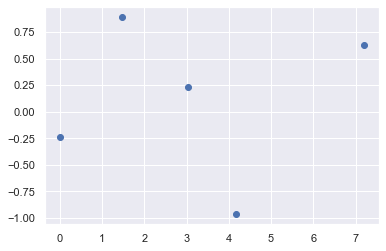

In [19]:
plt.scatter(x, y)

In [20]:
x[:, np.newaxis]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

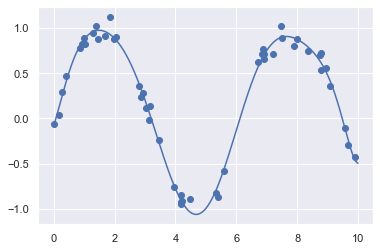

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

## Exercise 1

Load the sklearn dataset of the [Boston house prices](https://archive.ics.uci.edu/ml/datasets/housing) (link to the description). The Boston house prices is a dataset designated for testing and learning machine learning tools, it comes with a description of the dataset. 

Answer the following questions:
- Describe the summary of the data
- Perform multiple linear regression and determine:
    - The $R^2$ value
    - The coefficients and intercept values

In [22]:
# imports datasets from scikit-learn
from sklearn import datasets
import pandas as pd

# loads Boston dataset from datasets library 
data = datasets.load_boston() 

# description of the Boston dataset
print (data.DESCR)

# check the data type of data

print(type(data))

print(data)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names(x)  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

# define the data/predictors as the pre-set feature names  
#data.feature_names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame

#data.target

target = pd.DataFrame(data.target, columns=['MEDV'])

X = df
y = target['MEDV']

model.fit(X,y)

model.score(X,y)

#predictions = lm.predict(X)
#print(predictions)[0:5]

0.7406426641094094

In [25]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [26]:
model.intercept_

36.459488385089884

In [27]:
#calculate the R2 value

X.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [28]:
import statsmodels.api as sm

# Note the difference in argument order

model = sm.OLS(y, X).fit()

# make the predictions by the model

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:32:24   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import statsmodels.api as sm


# Note the difference in argument order

# make the predictions by the model

# Print out the statistics




In [30]:
# coefficients and intercept



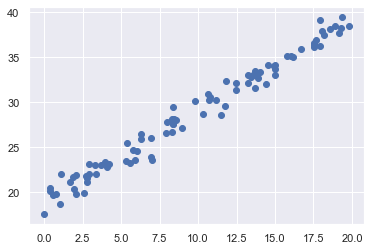

In [39]:
# Exercise
rng = np.random.RandomState(1)

# rng.rand = random numbers from 0-1
# *20 will generate num from 0-20
x = 20*rng.rand(90) #shows 90 values ranges 0-20
x[0:2]
y = x + 19 + rng.randn(90)
plt.scatter(x, y);

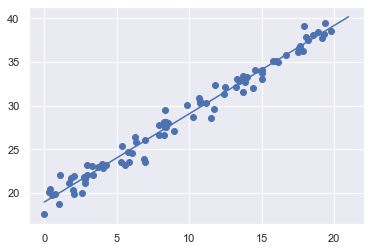

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

#This is the model
model.fit(x[:, np.newaxis], y)

#Predicting some points using the model
xfit = np.linspace(0, 21, 100) #draws the line till 21 but data only till 20
yfit = model.predict(xfit[:, np.newaxis])

#Plot a graph
plt.scatter(x, y)
plt.plot(xfit, yfit);